A média de público do Corinthian em 2019 foi de nan
A média de público do Flamengo em 2019 foi de 58992.05


ValueError: Axis limits cannot be NaN or Inf

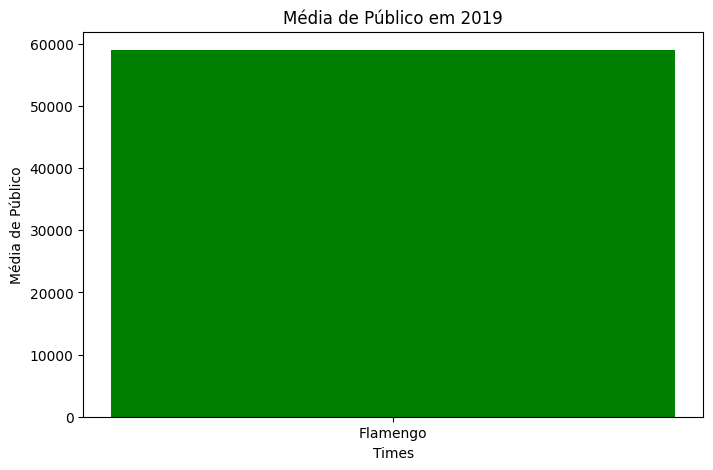

In [22]:
#calculando media de publico
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('brasileirao_serie_a.csv')

# Substituir valores nulos por zero
df = df.fillna(0)


df['ano_campeonato'] = df['ano_campeonato'].astype(int) #Nesse caso tivemos que realizar um tratamento de erro para evitar conflitos de tipos no csv
df['publico'] = pd.to_numeric(df['publico'], errors='coerce').fillna(0)


ano_escolhido = int(input('Escolha um ano para escolher: ').strip()) #Solicitamos a entrada do usuario
time_escolhido = input('Escolha um time para comparar: ').strip()
time_escolhido2 = input('Escolha outro time para comparar: ').strip()


media_de_publico1 = df[(df['ano_campeonato'] == ano_escolhido) & (df['time_mandante'] == time_escolhido)]['publico'].mean() #Calculamos a media de público
media_de_publico2 = df[(df['ano_campeonato'] == ano_escolhido) & (df['time_mandante'] == time_escolhido2)]['publico'].mean() 



print(f'A média de público do {time_escolhido} em {ano_escolhido} foi de {media_de_publico1:.2f}') #Exibimos as medias
print(f'A média de público do {time_escolhido2} em {ano_escolhido} foi de {media_de_publico2:.2f}')


times = [time_escolhido, time_escolhido2] #plotamos o gráfico
medias = [media_de_publico1, media_de_publico2]
plt.figure(figsize=(8, 5))
plt.bar(times, medias, color=['black', 'green'])
plt.title(f'Média de Público em {ano_escolhido}')
plt.xlabel('Times')
plt.ylabel('Média de Público')
plt.ylim(0, max(medias) + 10)
plt.show()

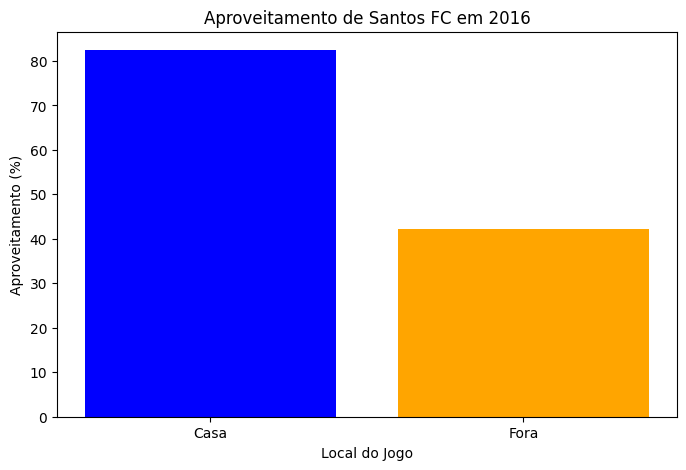

In [14]:
#calcular aproveitamento
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('brasileirao_serie_a.csv')  # Abrimos o arquivo
df = df.fillna(0)  # Substituímos valores nulos por 0

# Solicitar entrada do usuário
ano_escolhido = int(input('Escolha um ano para analisar: '))
time_escolhido = input('Escolha um time para comparar: ')

# Filtrar jogos do time escolhido como mandante e visitante no ano escolhido
jogos_mandante = df[(df['ano_campeonato'] == ano_escolhido) & (df['time_mandante'] == time_escolhido)]
jogos_visitante = df[(df['ano_campeonato'] == ano_escolhido) & (df['time_visitante'] == time_escolhido)]

# Calcular vitórias, empates e derrotas em casa
vitorias_casa = jogos_mandante[jogos_mandante['gols_mandante'] > jogos_mandante['gols_visitante']].shape[0]
empates_casa = jogos_mandante[jogos_mandante['gols_mandante'] == jogos_mandante['gols_visitante']].shape[0]
derrotas_casa = jogos_mandante[jogos_mandante['gols_mandante'] < jogos_mandante['gols_visitante']].shape[0]

# Calcular vitórias, empates e derrotas fora
vitorias_fora = jogos_visitante[jogos_visitante['gols_visitante'] > jogos_visitante['gols_mandante']].shape[0]
empates_fora = jogos_visitante[jogos_visitante['gols_visitante'] == jogos_visitante['gols_mandante']].shape[0]
derrotas_fora = jogos_visitante[jogos_visitante['gols_visitante'] < jogos_visitante['gols_mandante']].shape[0]

# Calcular pontos obtidos
pontos_casa = (vitorias_casa * 3) + (empates_casa * 1)
pontos_fora = (vitorias_fora * 3) + (empates_fora * 1)

# Calcular total de jogos
total_jogos_casa = jogos_mandante.shape[0]
total_jogos_fora = jogos_visitante.shape[0]

# Calcular pontos possíveis
pontos_possiveis_casa = total_jogos_casa * 3
pontos_possiveis_fora = total_jogos_fora * 3

# Calcular aproveitamento
aproveitamento_casa = (pontos_casa / pontos_possiveis_casa) * 100 if pontos_possiveis_casa > 0 else 0
aproveitamento_fora = (pontos_fora / pontos_possiveis_fora) * 100 if pontos_possiveis_fora > 0 else 0

# Criar o gráfico
labels = ['Casa', 'Fora']
aproveitamentos = [aproveitamento_casa, aproveitamento_fora]
plt.figure(figsize=(8, 5))
plt.bar(labels, aproveitamentos, color=['blue', 'orange'])
plt.title(f'Aproveitamento de {time_escolhido} em {ano_escolhido}')
plt.xlabel('Local do Jogo')
plt.ylabel('Aproveitamento (%)')
plt.show()

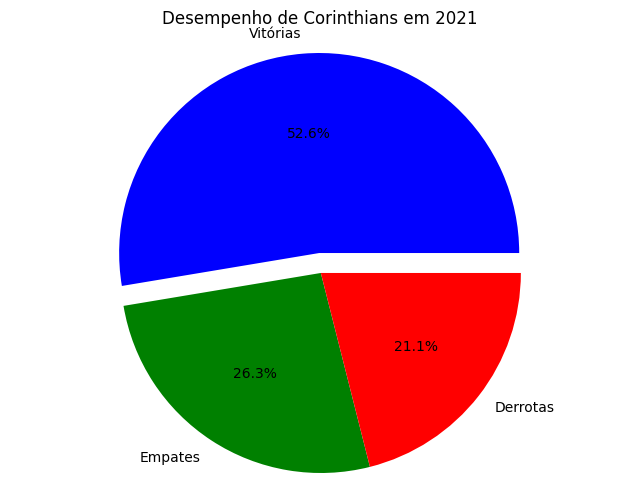

In [13]:
#calculando jogos em casa
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('brasileirao_serie_a.csv')  # Abrimos o arquivo
df = df.fillna(0)  # Substituímos valores nulos por 0

# Solicitar entrada do usuário
ano_escolhido = int(input('Escolha um ano para analisar: '))
time_escolhido = input('Escolha um time para comparar: ')

# Filtrar jogos do time escolhido no ano escolhido
jogos_time = df[(df['ano_campeonato'] == ano_escolhido) & (df['time_mandante'] == time_escolhido)]

# Calcular vitórias, empates e derrotas
vitorias = jogos_time[jogos_time['gols_mandante'] > jogos_time['gols_visitante']].shape[0]
empates = jogos_time[jogos_time['gols_mandante'] == jogos_time['gols_visitante']].shape[0]
derrotas = jogos_time[jogos_time['gols_mandante'] < jogos_time['gols_visitante']].shape[0]

# Preparar os dados para o gráfico
labels = ['Vitórias', 'Empates', 'Derrotas'] 
sizes = [vitorias, empates, derrotas]
colors = ['blue', 'green', 'red']
explode = (0.1, 0, 0)  # Destaca a fatia de vitórias

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal') 
plt.title(f'Desempenho de {time_escolhido} em {ano_escolhido}')
plt.show()